## Setup and Imports

In [ ]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Statistics and ML
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
## Load Data

/kaggle/input/amsterdam-housing-data/house_data4.csv


In [ ]:
# Load the housing dataset
import os

# Support both Kaggle and local environments
if os.path.exists('/kaggle/input/amsterdam-housing-data/house_data4.csv'):
    data_path = '/kaggle/input/amsterdam-housing-data/house_data4.csv'
else:
    data_path = 'house_data4.csv'

df = pd.read_csv(data_path)
df_train = df.copy()

In [4]:
df_train.columns

Index(['Unnamed: 0', 'house_id', 'city', 'house_type', 'building_type',
       'price', 'price_m2', 'room', 'bedroom', 'bathroom', 'living_area',
       'energy_label', 'has_balcony', 'has_garden', 'zip', 'address',
       'year_built', 'house_age', 'date_list', 'ym_list', 'year_list',
       'descrip'],
      dtype='object')

In [5]:
df_train.price.describe()

count    2.104000e+03
mean     8.284401e+05
std      7.478885e+05
min      1.999500e+05
25%      4.250000e+05
50%      5.900000e+05
75%      9.250000e+05
max      9.900000e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

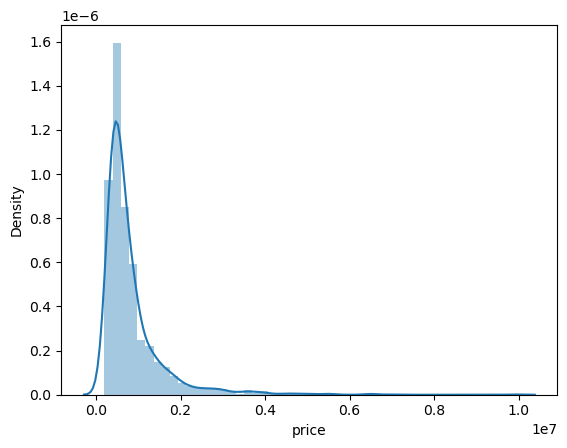

In [6]:
sns.distplot(df_train.price)

In [7]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 3.892951
Kurtosis: 23.879456


In [8]:
# Try removing houses with more than 350 square meters as they are useless 
df_train_real = df_train[df_train.living_area < 350]

## Exploratory Data Analysis

count                2067
unique                  2
top       Resale property
freq                 1839
Name: building_type, dtype: object


<Axes: xlabel='building_type', ylabel='count'>

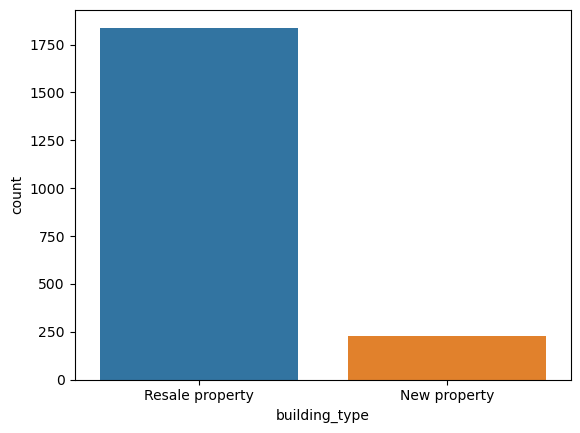

In [9]:
print(df_train_real.building_type.describe())
sns.countplot(x='building_type', data=df_train_real)

count            2067
unique              2
top       appartement
freq             1658
Name: house_type, dtype: object


<Axes: xlabel='house_type', ylabel='count'>

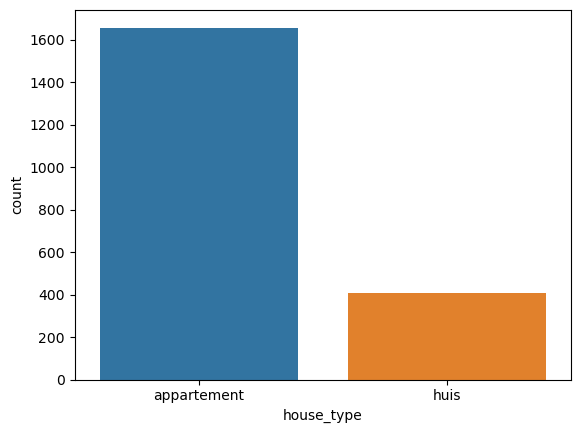

In [10]:
print(df_train_real.house_type.describe())
sns.countplot(x='house_type', data=df_train_real)

count    2067.000000
mean        3.780842
std         1.818976
min         1.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: room, dtype: float64


<Axes: xlabel='bedroom', ylabel='count'>

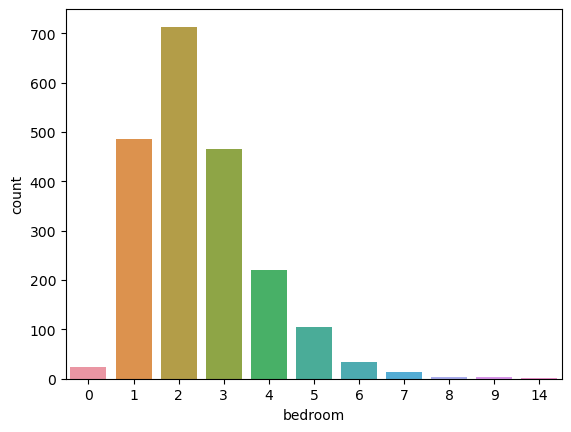

In [11]:
print(df_train_real.room.describe())
sns.countplot(x='bedroom', data=df_train_real)

count    2067.000000
mean        3.780842
std         1.818976
min         1.000000
25%         3.000000
50%         3.000000
75%         5.000000
max        15.000000
Name: room, dtype: float64


<Axes: xlabel='bathroom', ylabel='count'>

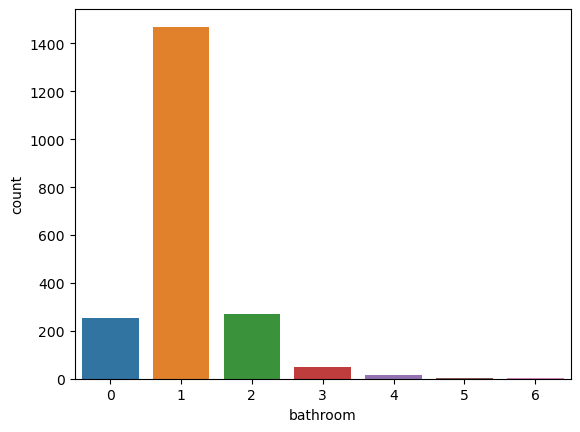

In [12]:
print(df_train_real.room.describe())
sns.countplot(x='bathroom', data=df_train_real)

count     2067
unique       9
top         na
freq       453
Name: energy_label, dtype: object


<Axes: xlabel='energy_label', ylabel='count'>

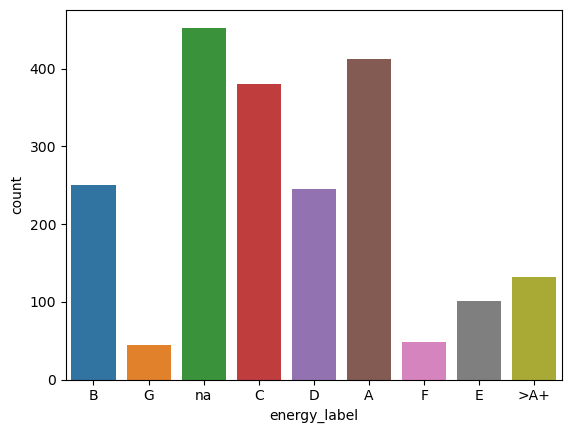

In [13]:
print(df_train_real.energy_label.describe())
sns.countplot(x='energy_label', data=df_train_real)

count    2067.000000
mean        0.355104
std         0.478661
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_balcony, dtype: float64


<Axes: xlabel='has_balcony', ylabel='count'>

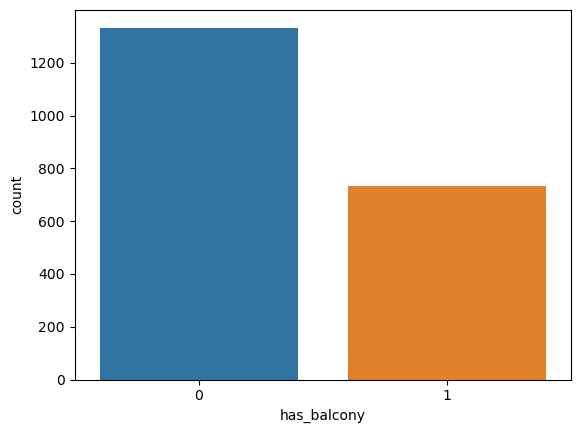

In [14]:
print(df_train_real.has_balcony.describe())
sns.countplot(x='has_balcony', data=df_train_real)

count    2067.000000
mean        0.694727
std         0.460635
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: has_garden, dtype: float64


<Axes: xlabel='has_garden', ylabel='count'>

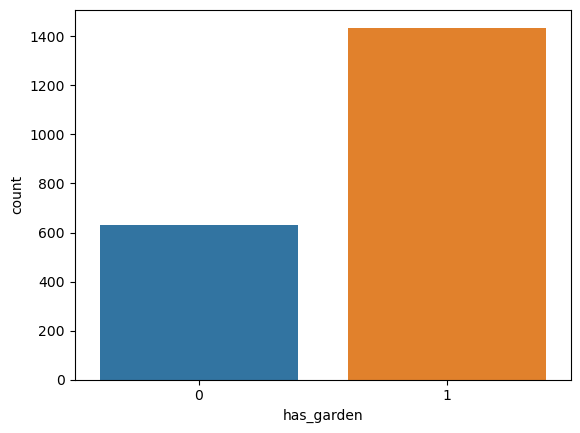

In [15]:
print(df_train_real.has_garden.describe())
sns.countplot(x='has_garden', data=df_train_real)

count    2067.000000
mean        0.355104
std         0.478661
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_balcony, dtype: float64


<Axes: xlabel='zip', ylabel='count'>

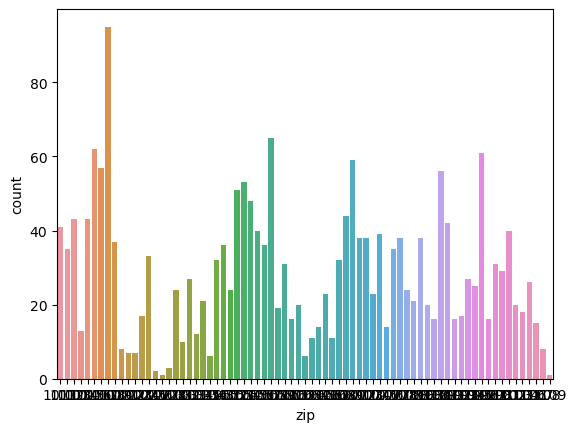

In [16]:
print(df_train_real.has_balcony.describe())
sns.countplot(x='zip', data=df_train_real)

### Scatter Plots

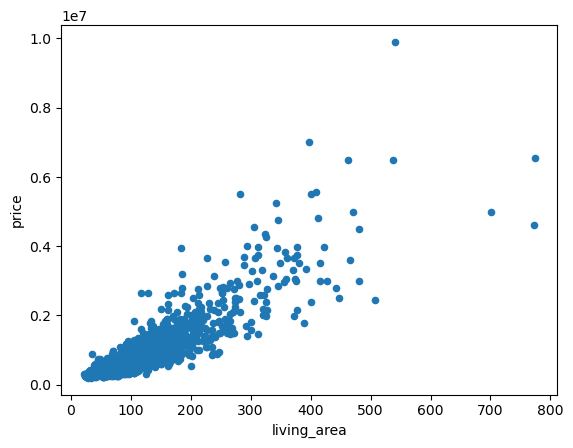

In [17]:
for var in ['living_area']: 
    data = pd.concat([df_train['price'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='price');

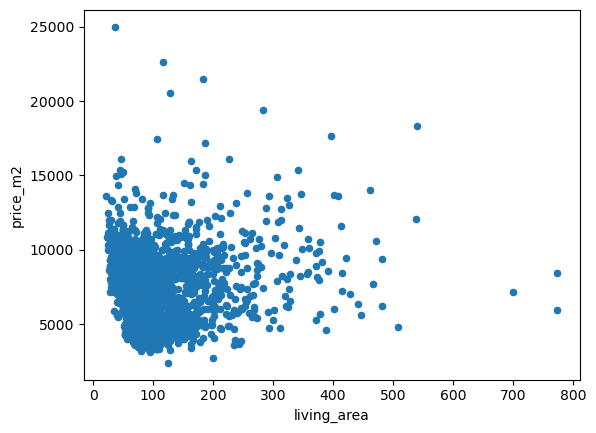

In [18]:
data = pd.concat([df_train['price_m2'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='price_m2');

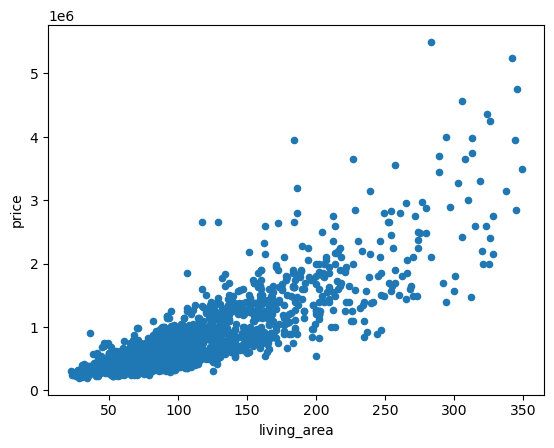

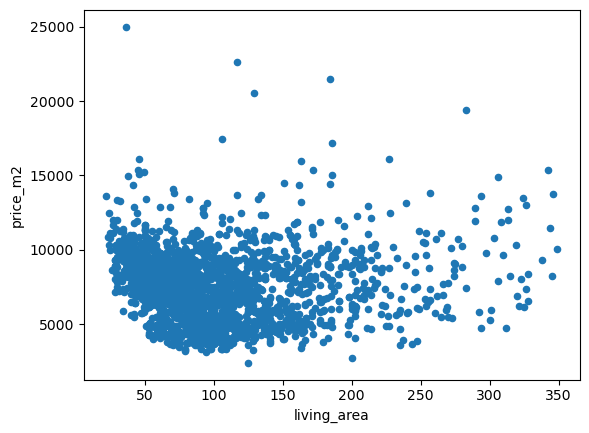

In [19]:
var = 'living_area'

data = pd.concat([df_train_real['price'], df_train_real[var]], axis=1)
data.plot.scatter(x=var, y='price');
    
data = pd.concat([df_train_real['price_m2'], df_train_real[var]], axis=1)
data.plot.scatter(x=var, y='price_m2');

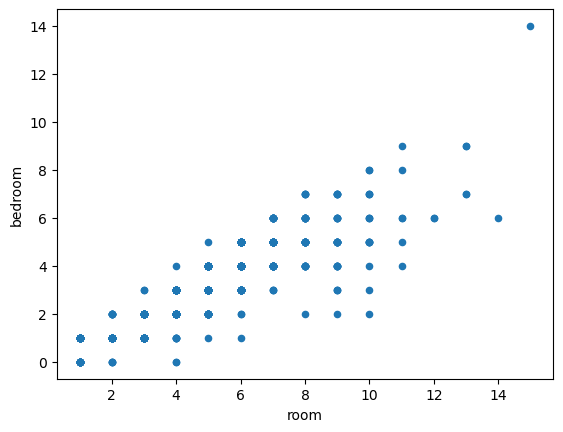

In [20]:
data = pd.concat([df_train_real['room'], df_train_real['bedroom']], axis=1)
data.plot.scatter(x='room', y='bedroom');

### Box Plots

building_type
room
bedroom
bathroom
room
energy_label
has_balcony
has_garden
building_type
room
bedroom
bathroom
room
energy_label
has_balcony
has_garden


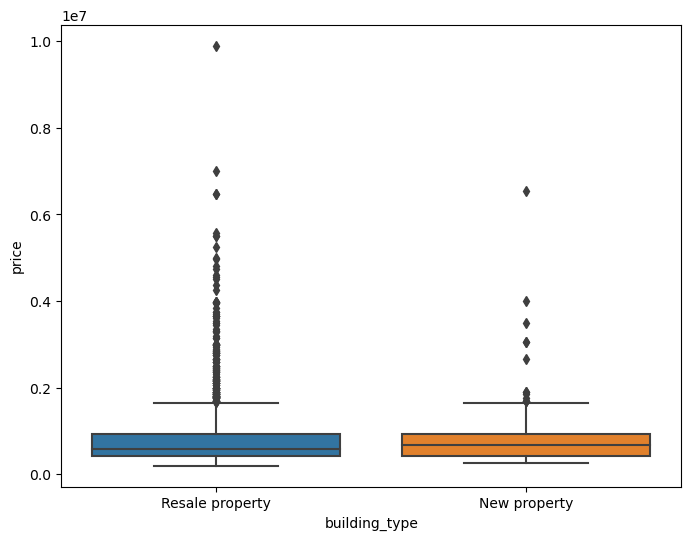

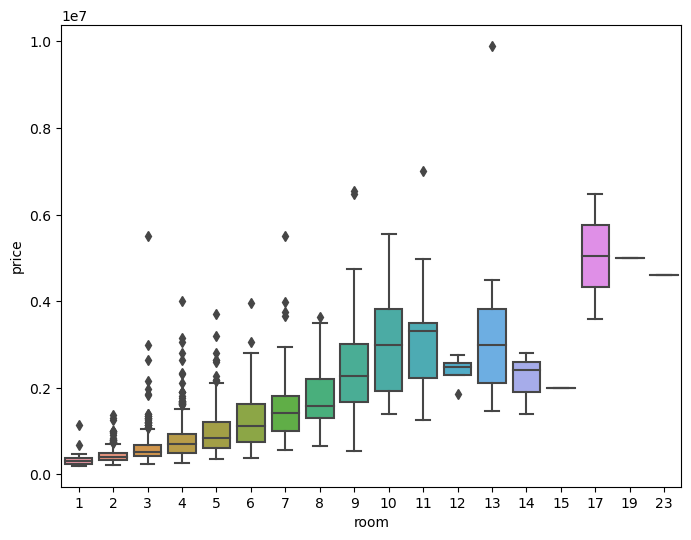

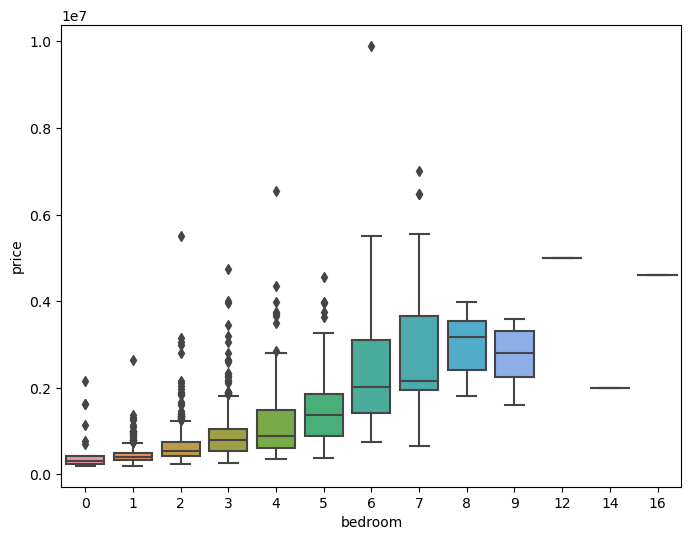

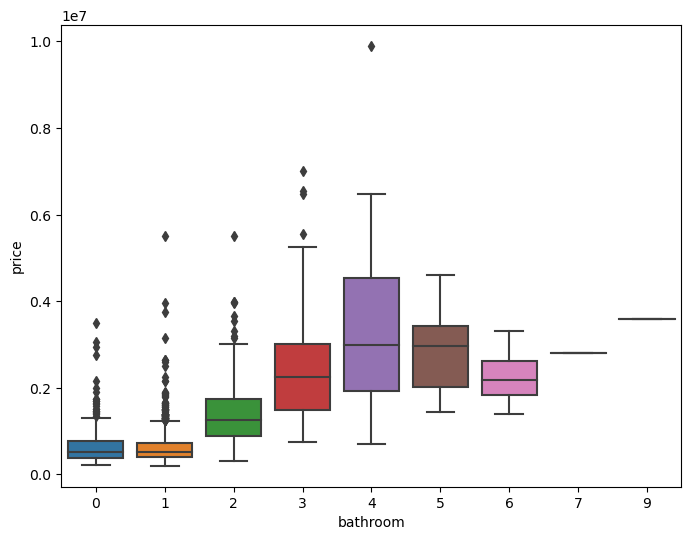

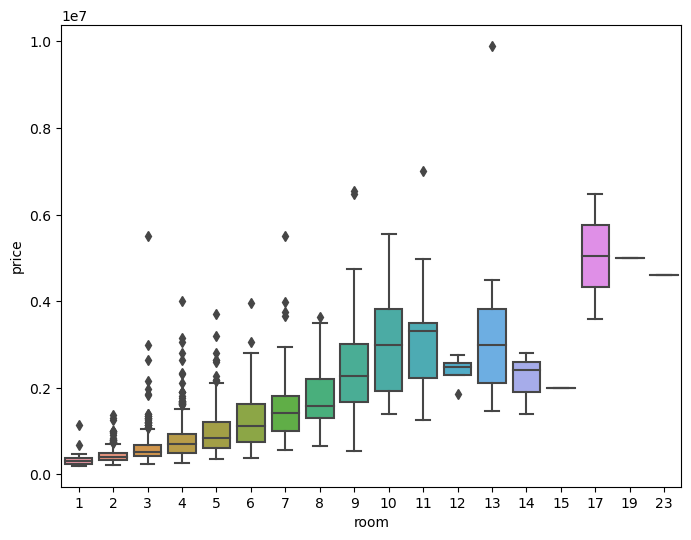

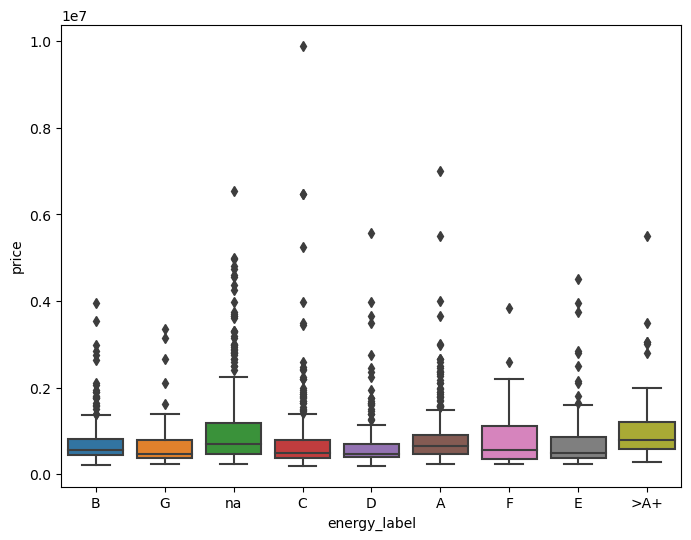

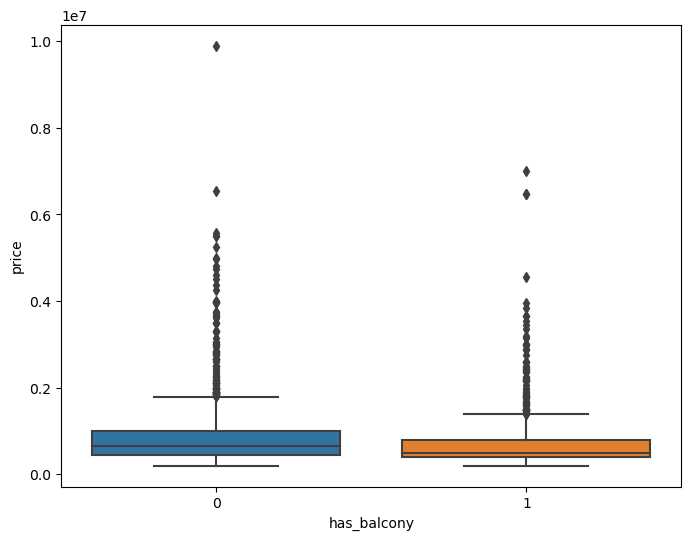

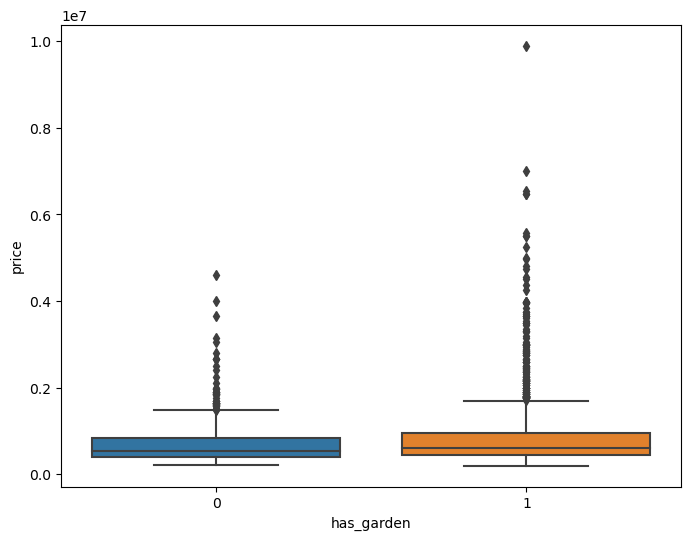

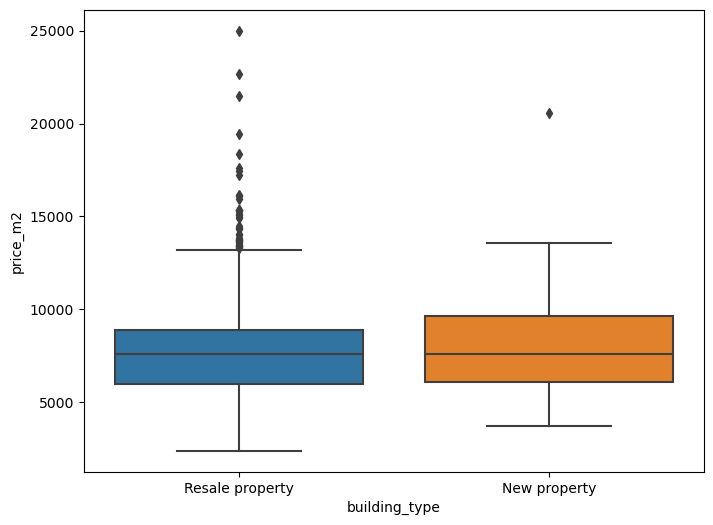

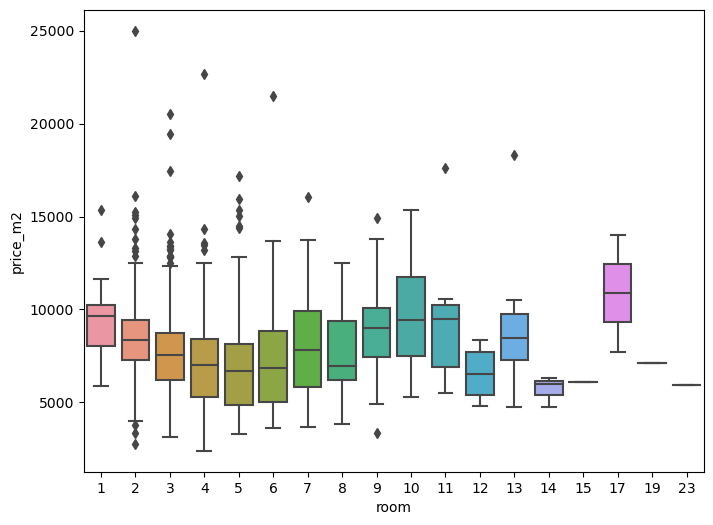

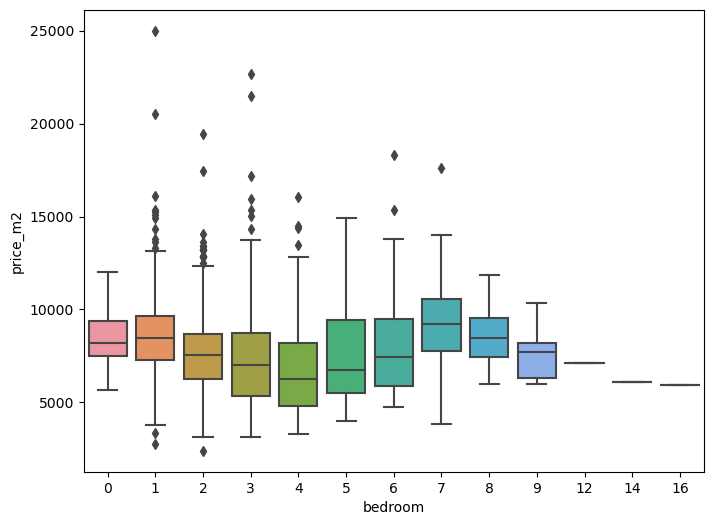

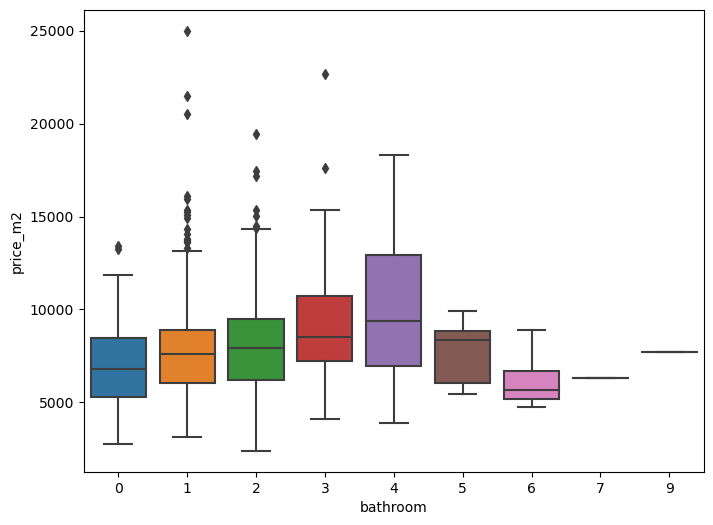

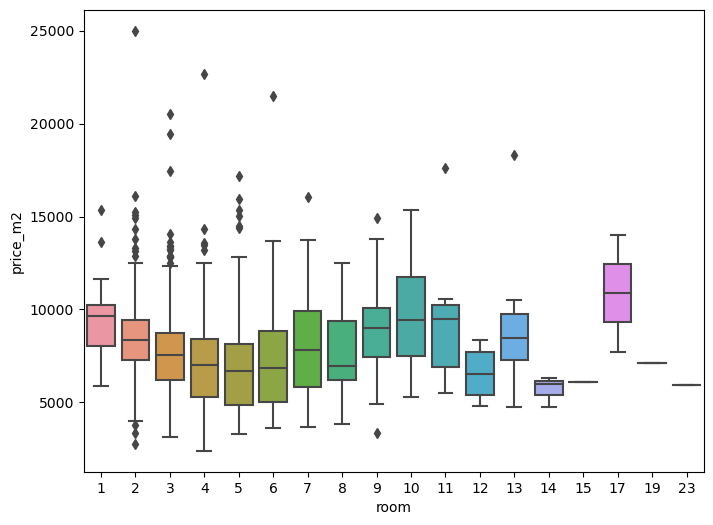

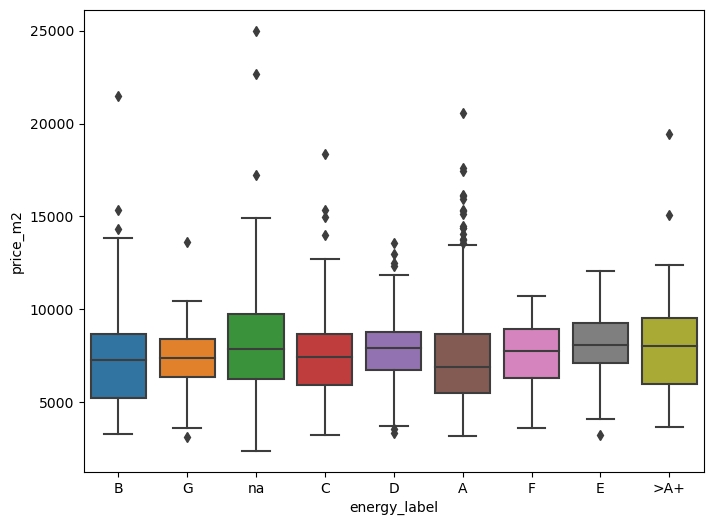

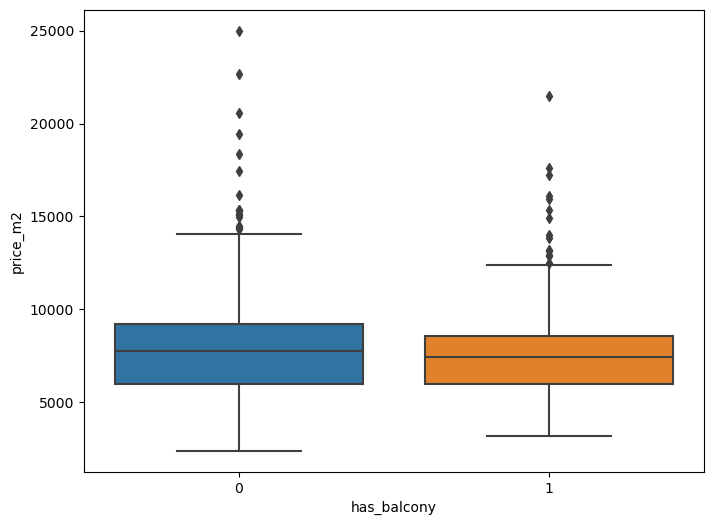

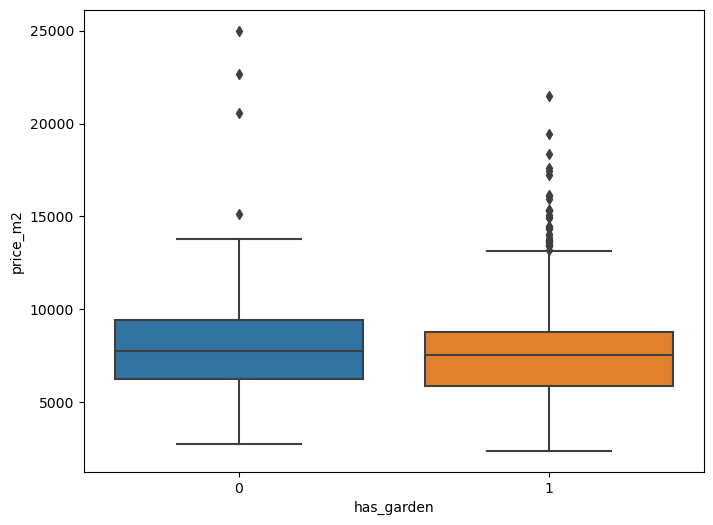

In [21]:
#box plot overallqual/saleprice
vars = ['building_type', 'room', 'bedroom', 'bathroom', 'room', 'energy_label', 'has_balcony', 'has_garden']

for var in vars: 
    print(var)
    data = pd.concat([df_train['price'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="price", data=data)
    # fig.axis(ymin=0, ymax=800000);
    
for var in vars: 
    print(var)
    data = pd.concat([df_train['price_m2'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="price_m2", data=data)
    # fig.axis(ymin=0, ymax=800000);

## Feature Engineering

In [ ]:
# Create district mapping from postal codes and calculate house age

In [23]:
type(df_train_real.zip.loc[0])

numpy.int64

In [24]:
def postcode_map(postcode):     
#     district = 'dog'
    if postcode in [1011, 1012]: 
        district = 'Old Centre'
    elif postcode in [1015, 1016, 1017, 1018]: 
        district = 'Canal Belt'
    elif postcode in [1019, 1020]: 
        district = 'Waterfront'
    elif postcode > 1020 and postcode <= 1036: 
        district = 'Amsterdam Noord'
    elif postcode in [1013, 1014] or (postcode > 1040 and postcode < 1047): 
        district = 'Sloterdijk Area'
    elif postcode in [1051, 1055, 1056, 1057, 1058]: 
        district = 'West'
    elif postcode in [1053, 1054, 1052]: 
        district = 'Oud-West'
    elif postcode >= 1059 and postcode <=1070: 
        district = 'New-West'
    elif postcode in [1071, 1075]: 
        district = 'Oud-Zuid'
    elif postcode in [1076, 1077]: 
        district = 'Zuidas'
    elif postcode in [1072, 1073, 1074]: 
        district = 'De Pijp'
    elif postcode in [1078, 1079]: 
        district = 'Rivierenbuurt'
    elif postcode in [1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098]: 
        district = 'Oost'
    elif postcode in [1081, 1082 ,1083, ]: 
        district = 'Buitenveldert'
    elif postcode >= 1100 or postcode in [1086, 1087]: 
        district = 'ZuidOost'
    else: 
        district = 'Unclassified'
    if district == 'dog': 
        print(postcode)
    return district

df_train_real['district'] = df_train_real.apply(lambda x: postcode_map(x.zip), axis=1)
    

count           2067
unique            15
top       Canal Belt
freq             257
Name: district, dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Oost'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Oud-West'),
  Text(3, 0, 'Canal Belt'),
  Text(4, 0, 'New-West'),
  Text(5, 0, 'Sloterdijk Area'),
  Text(6, 0, 'Amsterdam Noord'),
  Text(7, 0, 'ZuidOost'),
  Text(8, 0, 'De Pijp'),
  Text(9, 0, 'Oud-Zuid'),
  Text(10, 0, 'Rivierenbuurt'),
  Text(11, 0, 'Old Centre'),
  Text(12, 0, 'Buitenveldert'),
  Text(13, 0, 'Zuidas'),
  Text(14, 0, 'Waterfront')])

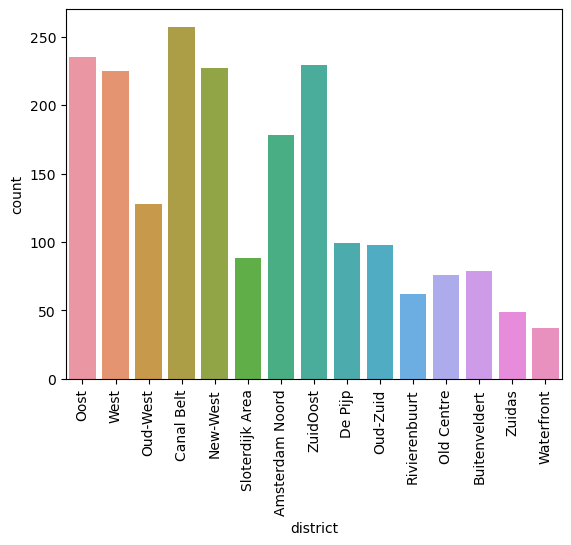

In [25]:
print(df_train_real.district.describe())
sns.countplot(x='district', data=df_train_real)
plt.xticks(rotation='vertical')

district
district


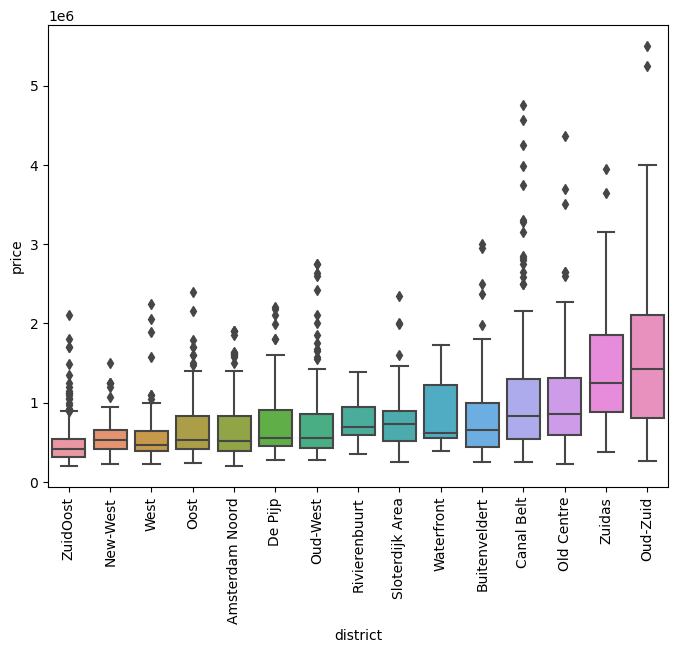

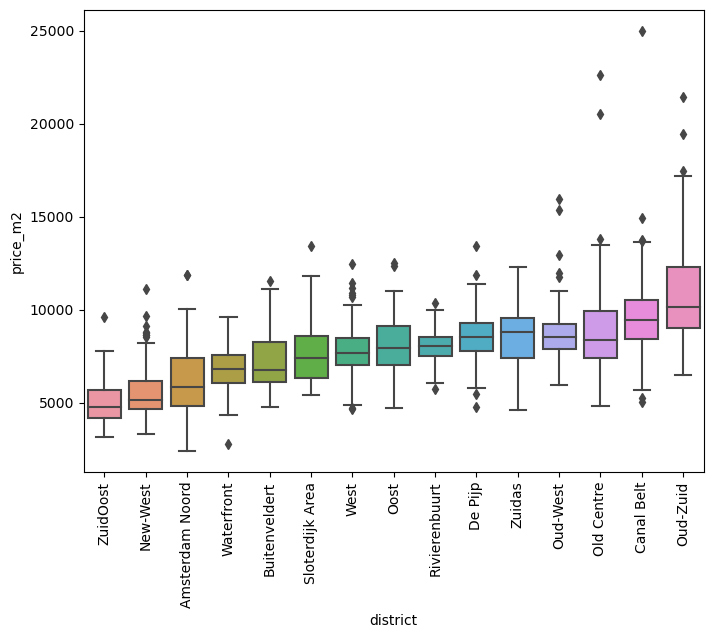

In [26]:
#box plot overallqual/saleprice
vars = ['district']

for var in vars: 
    print(var)
    data = pd.concat([df_train_real['price'], df_train_real[var]], axis=1)
    sorted_categories = data.groupby(var)['price'].mean().sort_values().index
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="price", data=data, order = sorted_categories)
    plt.xticks(rotation='vertical')
    # fig.axis(ymin=0, ymax=800000);
    
for var in vars: 
    print(var)
    data = pd.concat([df_train_real['price_m2'], df_train_real[var]], axis=1)
    sorted_categories = data.groupby(var)['price_m2'].mean().sort_values().index
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="price_m2", data=data, order = sorted_categories)
    plt.xticks(rotation='vertical')
    # fig.axis(ymin=0, ymax=800000);

In [27]:
df_train_real.columns

Index(['Unnamed: 0', 'house_id', 'city', 'house_type', 'building_type',
       'price', 'price_m2', 'room', 'bedroom', 'bathroom', 'living_area',
       'energy_label', 'has_balcony', 'has_garden', 'zip', 'address',
       'year_built', 'house_age', 'date_list', 'ym_list', 'year_list',
       'descrip', 'district'],
      dtype='object')

In [28]:
# df_train_real.energy_label.mean()

In [29]:
# df_train_real.energy_label.unique()

In [30]:
# replace energy label into ordered numbers 
df_train_real = df_train_real.replace({'energy_label': {'>A+': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7, 'G': 8, 'na': 0}})
df_train_real.energy_label

0       3
1       8
2       0
3       3
4       4
       ..
2098    0
2099    4
2100    1
2101    0
2103    5
Name: energy_label, Length: 2067, dtype: int64

In [31]:
mean_value = df_train_real[df_train_real['energy_label'] != 0]['energy_label'].mean()
df_train_real.loc[df_train_real['energy_label'] == 0, 'energy_label'] = mean_value

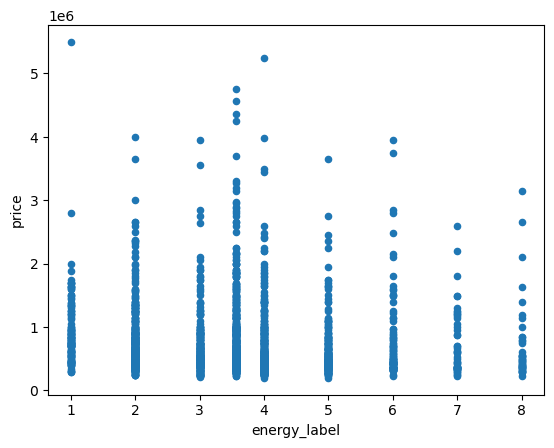

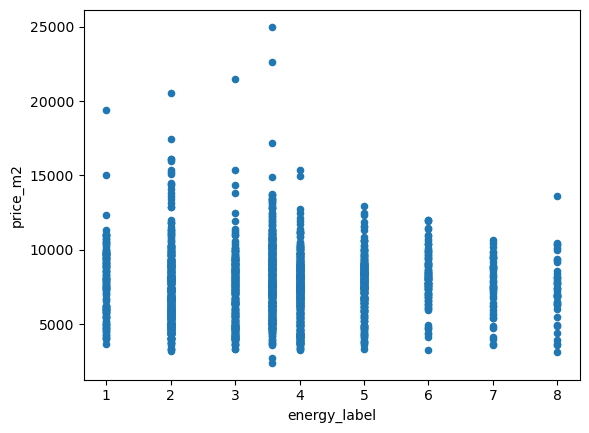

In [32]:
var = 'energy_label'

data = pd.concat([df_train_real['price'], df_train_real[var]], axis=1)
data.plot.scatter(x=var, y='price');
    
data = pd.concat([df_train_real['price_m2'], df_train_real[var]], axis=1)
data.plot.scatter(x=var, y='price_m2');

In [33]:
df_train_real['year_built_adjusted'] = df_train_real['year_built']
mean_value = df_train_real[df_train_real['year_built_adjusted'] != 0]['year_built_adjusted'].mean()
df_train_real.loc[df_train_real['year_built_adjusted'] == 0, 'year_built_adjusted'] = mean_value

df_train_real['house_age_adjusted'] = 2023 - df_train_real['year_built_adjusted']
df_train_real.loc[df_train_real['house_age_adjusted'] < 0, 'house_age_adjusted'] = 1

In [34]:
df_train_real.house_age_adjusted.mean()

74.39231736816642

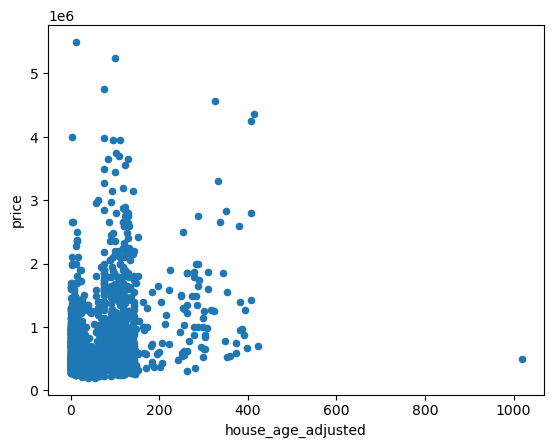

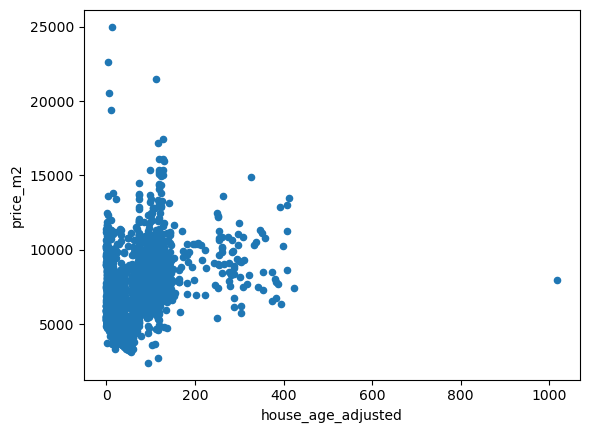

In [35]:
var = 'house_age_adjusted'

data = pd.concat([df_train_real['price'], df_train_real[var]], axis=1)
data.plot.scatter(x=var, y='price');
    
data = pd.concat([df_train_real['price_m2'], df_train_real[var]], axis=1)
data.plot.scatter(x=var, y='price_m2');

In [36]:
corr = df_train_real.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

price                  1.000000
living_area            0.844531
room                   0.663226
bedroom                0.561743
bathroom               0.545794
price_m2               0.451954
house_age_adjusted     0.232175
house_age              0.121815
has_garden             0.116586
Unnamed: 0            -0.009142
year_list             -0.031623
energy_label          -0.074965
has_balcony           -0.090218
year_built            -0.121815
house_id              -0.145678
zip                   -0.157544
year_built_adjusted   -0.232337
Name: price, dtype: float64


In [37]:
df_train_real.columns

Index(['Unnamed: 0', 'house_id', 'city', 'house_type', 'building_type',
       'price', 'price_m2', 'room', 'bedroom', 'bathroom', 'living_area',
       'energy_label', 'has_balcony', 'has_garden', 'zip', 'address',
       'year_built', 'house_age', 'date_list', 'ym_list', 'year_list',
       'descrip', 'district', 'year_built_adjusted', 'house_age_adjusted'],
      dtype='object')

In [38]:
cols_to_keep = ['price', 'house_type', 'building_type', 'living_area', 'bedroom', 'bathroom', 'house_age_adjusted', 'has_garden', 'has_balcony', 'energy_label', 'district']
df_train_real_cols =  df_train_real[cols_to_keep]

In [39]:
#log transform the target:
df_train_real_cols["price"] = np.log1p(df_train_real_cols["price"])

#log transform skewed numeric features:
numeric_feats = df_train_real_cols.dtypes[df_train_real_cols.dtypes != "object"].index

skewed_feats = df_train_real_cols[numeric_feats].apply(lambda x: stats.skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

df_train_real_cols[skewed_feats] = np.log1p(df_train_real_cols[skewed_feats])

In [40]:
skewed_feats

Index(['living_area', 'bedroom', 'bathroom', 'house_age_adjusted'], dtype='object')

In [41]:
df_train_real_cols = pd.get_dummies(df_train_real_cols)

In [42]:
df_train_real_cols.columns

Index(['price', 'living_area', 'bedroom', 'bathroom', 'house_age_adjusted',
       'has_garden', 'has_balcony', 'energy_label', 'house_type_appartement',
       'house_type_huis', 'building_type_New property',
       'building_type_Resale property', 'district_Amsterdam Noord',
       'district_Buitenveldert', 'district_Canal Belt', 'district_De Pijp',
       'district_New-West', 'district_Old Centre', 'district_Oost',
       'district_Oud-West', 'district_Oud-Zuid', 'district_Rivierenbuurt',
       'district_Sloterdijk Area', 'district_Waterfront', 'district_West',
       'district_ZuidOost', 'district_Zuidas'],
      dtype='object')

In [43]:
train = df_train_real_cols.drop(columns=['price'])
y = df_train_real_cols[['price']]

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1446, 26)
X_test : (621, 26)
y_train : (1446, 1)
y_test : (621, 1)


In [44]:
X_train.isna().sum()

living_area                      0
bedroom                          0
bathroom                         0
house_age_adjusted               0
has_garden                       0
has_balcony                      0
energy_label                     0
house_type_appartement           0
house_type_huis                  0
building_type_New property       0
building_type_Resale property    0
district_Amsterdam Noord         0
district_Buitenveldert           0
district_Canal Belt              0
district_De Pijp                 0
district_New-West                0
district_Old Centre              0
district_Oost                    0
district_Oud-West                0
district_Oud-Zuid                0
district_Rivierenbuurt           0
district_Sloterdijk Area         0
district_Waterfront              0
district_West                    0
district_ZuidOost                0
district_Zuidas                  0
dtype: int64

## Modeling

In [45]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

def rmse_cv(model, X_train, y):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [46]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 0.1866515637828942
RMSE on Test set : 0.19638336676691295


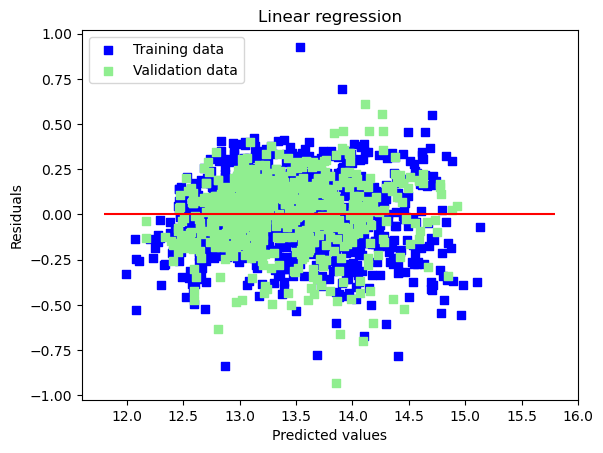

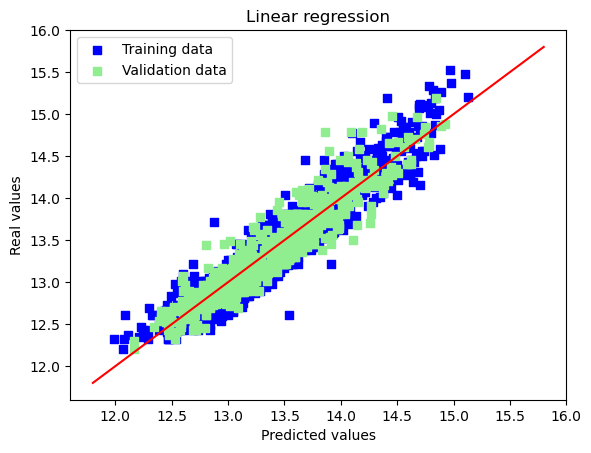

In [47]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.8, xmax = 15.8, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11.8, 15.8], [11.8, 15.8], c = "red")
plt.show()

In [48]:
len(lr.coef_[0])

26

In [49]:
len(X_train.columns)

26

Linear Regression picked 26 features and eliminated the other 0 features


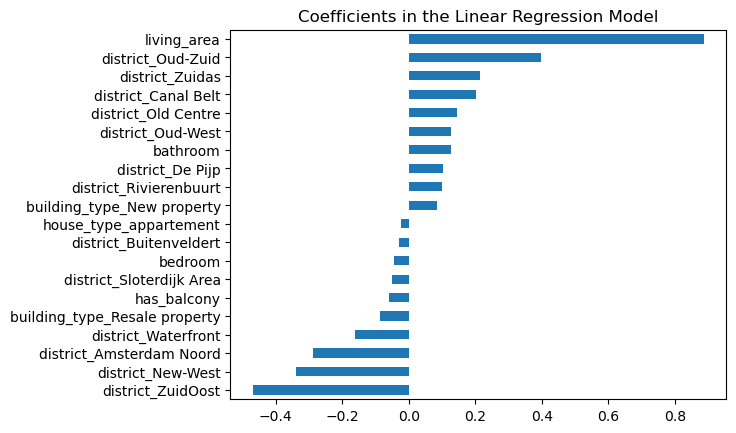

In [50]:
# Plot important coefficients
coefs = pd.Series(lr.coef_[0], index = X_train.columns)
print("Linear Regression picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()

Best alpha : 0.6
Try again for more precision with alphas centered around 0.6
Best alpha : 0.84
Ridge RMSE on Training set : 0.1866437060500542
Ridge RMSE on Test set : 0.1961777705365428


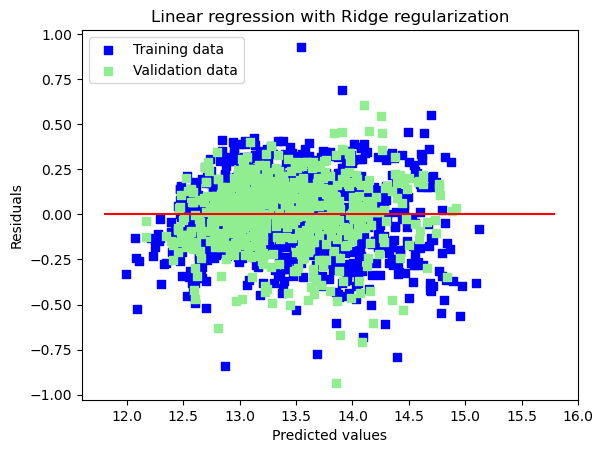

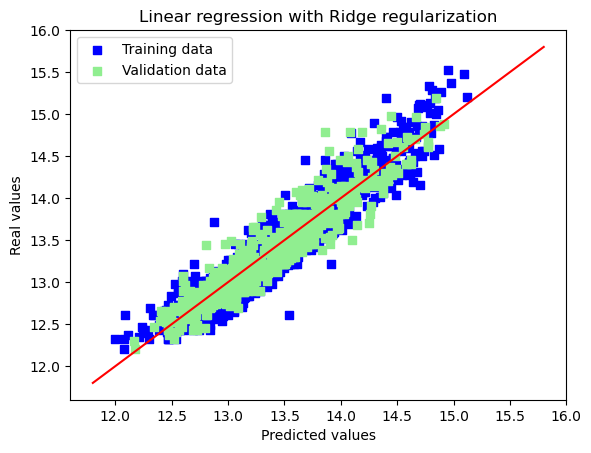

Ridge picked 26 features and eliminated the other 0 features


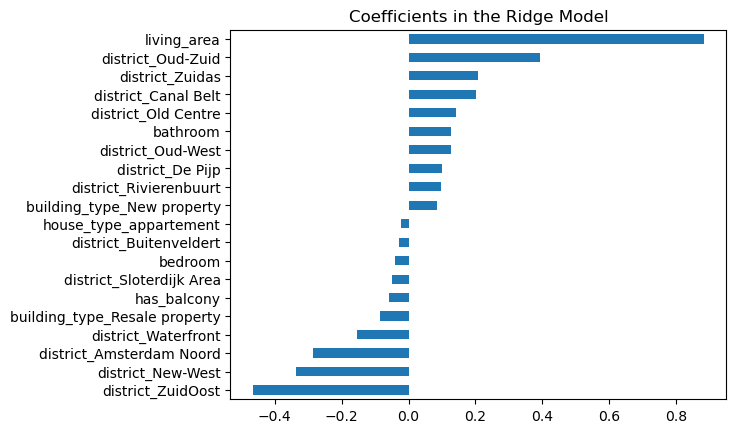

In [51]:
#Try Ridge 
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.8, xmax = 15.8, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11.8, 15.8], [11.8, 15.8], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_[0], index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

## Finding Underpriced Properties

In [52]:
y_train

,price
2004,13.122365
1267,12.736704
1256,13.122365
1166,12.388398
22,13.017005
...,...
1052,13.279369
1761,12.834684
779,13.081543
851,13.262146


In [53]:
# Calculate residuals for training set
residuals_train = y_train - y_train_rdg

# Calculate residuals for test set
residuals_test = y_test - y_test_rdg

residuals = pd.concat([residuals_train, residuals_test])

# For the training set
# Find the indexes of the houses with the 20 maximum residuals - most overpriced 20 houses in Amsterdam
max_residual_train_indexes = residuals.nlargest(20, columns='price').index
# Print the indexes and the residuals
print('Most over priced houses in Amsterdam')
print(max_residual_train_indexes)

min_residual_train_indexes = residuals.nsmallest(20, columns='price').index
# Print the indexes and the residuals
print('Most under priced houses in Amsterdam')
print(min_residual_train_indexes)

Most over priced houses in Amsterdam
Int64Index([1297, 1693, 1080,  388,  856, 1421,  360,  483,  852,  127,  956,
             835, 1616, 1501, 1461, 1410, 2084,  401, 1102, 1752],
           dtype='int64')
Most under priced houses in Amsterdam
Int64Index([1527,  722,  158, 1617, 1659,  277, 1898, 1936, 1926, 2079, 2011,
            1324,  796,  882,   32, 1340,  229,   59, 1132, 1317],
           dtype='int64')


In [54]:
y_train

,price
2004,13.122365
1267,12.736704
1256,13.122365
1166,12.388398
22,13.017005
...,...
1052,13.279369
1761,12.834684
779,13.081543
851,13.262146


In [55]:
y_train_copy = y_train.copy()
y_train_copy['price'] = y_train_rdg

y_test_copy = y_test.copy()
y_test_copy['price'] = y_test_rdg

fairs_log = pd.concat([y_train_copy, y_test_copy])
fairs = np.expm1(fairs_log)

In [56]:
df['fair_price'] = fairs
df['potential'] = df['fair_price'] - df['price']
df['district'] = df['zip'].apply(lambda x: postcode_map(x))

In [57]:
df.district.unique()

array(['Oost', 'West', 'Oud-West', 'Canal Belt', 'New-West',
       'Sloterdijk Area', 'Amsterdam Noord', 'ZuidOost', 'De Pijp',
       'Oud-Zuid', 'Rivierenbuurt', 'Old Centre', 'Buitenveldert',
       'Zuidas', 'Waterfront'], dtype=object)

In [58]:
df[df.price < 800000].nsmallest(20, columns = 'potential')

,Unnamed: 0,house_id,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,...,address,year_built,house_age,date_list,ym_list,year_list,descrip,fair_price,potential,district
483,483,88238586,amsterdam,huis,Resale property,685000,13431.4,3,2,0,...,Korte Prinsengracht 109 G,1923,100,2022-12-30 20:20:39.670759,2022-12-01,2022,\r\nOp een van de mooiste kruispunten van o...,364233.450345,-320766.549655,Sloterdijk Area
1985,1985,42144510,amsterdam,appartement,Resale property,725000,8734.9,4,2,1,...,Woubruggestraat 30 H,1930,93,2023-06-17 00:00:00.000000,2023-06-01,2023,\r\nA new home starts at Woubruggestraat 30...,453430.406526,-271569.593474,New-West
688,688,42026577,amsterdam,appartement,Resale property,695000,9144.7,3,2,1,...,Westlandgracht 181 H,1933,90,2023-02-28 20:20:39.671757,2023-02-01,2023,\r\nWestlandgracht 181 H in Amsterdam **Eng...,429313.852455,-265686.147545,New-West
1665,1665,88578765,amsterdam,huis,Resale property,795000,7227.3,6,5,2,...,Haringbuisdijk 961,1903,120,2023-05-24 20:20:39.676502,2023-05-01,2023,\r\nWoonschip met ligplaats Sluishuis-promena...,543335.635128,-251664.364872,ZuidOost
2035,2035,42946307,amsterdam,appartement,New property,699000,7597.8,3,1,0,...,Terrace 611,2022,1,2022-12-30 20:20:39.678040,2022-12-01,2022,\r\nOpen huis! Op woensdag 15 maart 2023 i...,472429.484445,-226570.515555,ZuidOost
2084,2084,42146788,amsterdam,appartement,Resale property,550000,9649.1,3,2,1,...,Westlandgracht 167 HS,1933,90,2023-06-14 20:20:39.678040,2023-06-01,2023,"\r\nWestlandgracht 167-hs, 1059 TJ Amsterdam...",327091.790809,-222908.209191,New-West
1610,1610,88335214,amsterdam,huis,Resale property,695000,8687.5,5,3,1,...,Meeuwenlaan 3 a,1906,117,2022-12-30 20:20:39.676502,2022-12-01,2022,\r\nOp de mooiste ligplaats van Amsterdam b...,481883.968064,-213116.031936,Amsterdam Noord
996,996,42134574,amsterdam,appartement,Resale property,699000,8321.4,4,3,1,...,Conny Stuartstraat 63,2021,2,2023-06-14 20:20:39.673263,2023-06-01,2023,"\r\nBright, spacious and tasteful 3-bedroom ...",493617.846227,-205382.153773,Amsterdam Noord
1650,1650,42148012,amsterdam,appartement,Resale property,785000,12868.9,3,2,1,...,Spinozastraat 19 I,0,2023,2023-06-14 20:20:39.676502,2023-06-01,2023,\r\nSplinternieuw gerenoveerd appartement aan...,585563.833321,-199436.166679,Canal Belt
1369,1369,42102080,amsterdam,appartement,Resale property,485000,8660.7,4,2,1,...,Stolwijkstraat 18 I,1930,93,2023-05-17 20:20:39.675300,2023-05-01,2023,"\r\nGraag bieden wij u aan, dit sfeervolle ...",296912.905557,-188087.094443,New-West


In [59]:
df_price_range = df[df.price < 800000]
df_price_range = df_price_range[df_price_range.district.isin(['Oud-West'])]
df_price_range.nsmallest(20, columns = 'potential')

,Unnamed: 0,house_id,city,house_type,building_type,price,price_m2,room,bedroom,bathroom,...,address,year_built,house_age,date_list,ym_list,year_list,descrip,fair_price,potential,district
1769,1769,42116818,amsterdam,appartement,Resale property,600000,10344.8,3,2,1,...,Jacob van Lennepkade 69 1,0,2023,2023-05-17 20:20:39.677008,2023-05-01,2023,\r\nVery light and well-designed two-room ap...,497040.646019,-102959.353981,Oud-West
642,642,42191977,amsterdam,appartement,Resale property,750000,9146.3,3,2,1,...,Jacob van Lennepstraat 30 III,1880,143,2023-05-03 20:20:39.670759,2023-05-01,2023,\r\nWonderfully light and spacious double (8...,650676.121040,-99323.878960,Oud-West
31,31,42254694,amsterdam,appartement,Resale property,725000,8333.3,3,2,0,...,De Clercqstraat 134 2,1931,92,2023-06-27 20:20:39.668723,2023-06-01,2023,\r\nNIEUW IN DE VERKOOP – Turn-key 3 kamer ...,632713.390957,-92286.609043,Oud-West
485,485,42148934,amsterdam,appartement,Resale property,700000,10144.9,4,3,1,...,Bellamystraat 68 hs,1892,131,2023-06-14 20:20:39.670759,2023-06-01,2023,"\r\nBellamystraat 68 hs, 1053 BN Amsterdam ...",618008.248584,-81991.751416,Oud-West
1008,1008,42123652,amsterdam,appartement,Resale property,495000,11785.7,2,1,1,...,Tweede Helmersstraat 2 I,1892,131,2023-06-07 20:20:39.673263,2023-06-01,2023,"\r\nLuxurious, high-quality renovated and en...",422418.311875,-72581.688125,Oud-West
1532,1532,42109277,amsterdam,appartement,Resale property,435000,10116.3,2,1,0,...,Bosboom Toussaintstraat 1 A2,1897,126,2023-05-10 20:20:39.675300,2023-05-01,2023,"\r\nExtremely charming, bright and spacious ...",363885.099496,-71114.900504,Oud-West
1900,1900,42199548,amsterdam,appartement,Resale property,360000,12000.0,2,1,1,...,Overtoom 10 B,0,2023,2023-05-03 20:20:39.677008,2023-05-01,2023,"\r\nOVERTOOM 10-B, 1054 HH AMSTERDAM Hoogwa...",306693.609801,-53306.390199,Oud-West
753,753,88531765,amsterdam,appartement,Resale property,445000,10595.2,2,1,1,...,Rhijnvis Feithstraat 13 1,1906,117,2023-04-29 20:20:39.671757,2023-04-01,2023,\r\nGelegen in het gezellig Amsterdam Oud-We...,395730.284443,-49269.715557,Oud-West
230,230,42137735,amsterdam,appartement,Resale property,375000,10135.1,2,1,1,...,Ten Katestraat 18 I,1900,123,2023-06-07 20:20:39.669762,2023-06-01,2023,\r\nCompleet gerenoveerde 2-kamerwoning (37m²...,330697.872145,-44302.127855,Oud-West
1075,1075,88575889,amsterdam,appartement,Resale property,600000,8823.5,2,1,0,...,Nassaukade 340 A,1984,39,2023-05-24 20:20:39.674300,2023-05-01,2023,\r\nFor sale via Home of Orange! Are you ...,556503.663141,-43496.336859,Oud-West


In [60]:
df_price_range.potential.mean()

14852.889671680758

In [61]:
df_price_range.groupby('district')['potential'].mean()

district
Oud-West    14852.889672
Name: potential, dtype: float64

In [62]:
df['building_type'].unique()

array(['Resale property', 'New property'], dtype=object)

In [63]:
X_train.columns

Index(['living_area', 'bedroom', 'bathroom', 'house_age_adjusted',
       'has_garden', 'has_balcony', 'energy_label', 'house_type_appartement',
       'house_type_huis', 'building_type_New property',
       'building_type_Resale property', 'district_Amsterdam Noord',
       'district_Buitenveldert', 'district_Canal Belt', 'district_De Pijp',
       'district_New-West', 'district_Old Centre', 'district_Oost',
       'district_Oud-West', 'district_Oud-Zuid', 'district_Rivierenbuurt',
       'district_Sloterdijk Area', 'district_Waterfront', 'district_West',
       'district_ZuidOost', 'district_Zuidas'],
      dtype='object')

In [64]:
# for column in X_train.columns: 
#     if column ==

In [65]:
s = pd.DataFrame(columns=X_train.columns)

In [66]:
skewed_feats

Index(['living_area', 'bedroom', 'bathroom', 'house_age_adjusted'], dtype='object')

In [67]:
np.log1p([3, 5])

array([1.38629436, 1.79175947])

In [68]:
'district_Amsterdam Noord'.split('_')[-1]

'Amsterdam Noord'

In [69]:
cols_to_keep = ['house_type', 'building_type', 'living_area', 'bedroom', 'bathroom', 'house_age_adjusted', 'has_garden', 'has_balcony', 'energy_label', 'district']
house_properties = {
    'house_type': ['appartement', 'appartement', 'appartement', 'appartement', 'appartement', 'appartement', 'appartement', 'appartement'], # 'appartement', 'huis'
    'building_type': ['Resale property', 'Resale property', 'Resale property', 'Resale property', 'Resale property', 'Resale property', 'Resale property', 'Resale property'], #Resale property', 'New property'
    'living_area': [65, 61, 93, 87, 77, 77, 76, 74], 
    'bedroom': [2, 2, 3, 2, 2, 2, 2, 1], 
    'bathroom': [1, 1, 2, 2, 1, 2, 1, 1], 
    'house_age_adjusted': [124, 135, 106, 117, 139, 98, 17, 30], #use 74 if unknown
    'has_garden': [0, 0, 0, 0, 0, 0, 0, 0], 
    'has_balcony': [1, 1, 1, 1, 1, 1, 0, 1], 
    'energy_label': [3, 4, 3, 3.5, 1, 3.5, 1, 4], #A+ is 1, G is 8
    'district': ['De Pijp', 'De Pijp', 'Oud-West', 'Canal Belt', 'Oud-Zuid', 'West', 'Oud-West', 'Noord']
}

def calculate_fair_value(house_properties, model=lr): 
    df_dict = dict()
    categorical_vars = ['house_type', 'building_type', 'district']
    for column in X_train.columns: 
        if column in ('living_area', 'bedroom', 'bathroom', 'house_age_adjusted', 'has_garden', 'has_balcony', 'energy_label'): 
            if column in skewed_feats: 
                df_dict[column] = np.log1p(house_properties[column])
            else: 
                df_dict[column] = house_properties[column]
        if any(option in column for option in categorical_vars): 
            for option in categorical_vars: 
                if option in column: 
                    column_org = option
                    break
            column_type = column.split('_')[-1]
            df_dict[column] = [x == column_type for x in house_properties[column_org]]
    
    input_df = pd.DataFrame(df_dict)
    
    return np.expm1(model.predict(input_df))
            
        

In [70]:
s.columns

Index(['living_area', 'bedroom', 'bathroom', 'house_age_adjusted',
       'has_garden', 'has_balcony', 'energy_label', 'house_type_appartement',
       'house_type_huis', 'building_type_New property',
       'building_type_Resale property', 'district_Amsterdam Noord',
       'district_Buitenveldert', 'district_Canal Belt', 'district_De Pijp',
       'district_New-West', 'district_Old Centre', 'district_Oost',
       'district_Oud-West', 'district_Oud-Zuid', 'district_Rivierenbuurt',
       'district_Sloterdijk Area', 'district_Waterfront', 'district_West',
       'district_ZuidOost', 'district_Zuidas'],
      dtype='object')

In [71]:
s[['district_De Pijp']]

,district_De Pijp


In [72]:
calculate_fair_value(house_properties)

array([[519726.8877568 ],
       [480803.26118071],
       [758673.21029827],
       [772243.25941318],
       [844879.26719527],
       [581615.20570798],
       [685295.2657771 ],
       [527850.61772297]])